# Variable Types - Assignment

This notebook is an assignment for variable types section of feature engineering for machine learning course by Soledad Galli. The original notebook can be found in repo https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/exercises/03-variable-types/assignment.ipynb

In [1]:
# importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data 

In [2]:
data_path = '../../datasets/bank-marketing.csv'
data = pd.read_csv(data_path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,NaN,-1.0,0,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0,unknown,0


# Are there categorical variables?

Yes. The most simple way to see what variables are categorical is to see their types directly:

In [42]:
data.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous       int64
poutcome      object
subscribe      int64
dtype: object

Variables that are 'object' are categorical. We can filter using a list comprehension:

In [43]:
# categorical variables
categorical_variables = [
    column for column in data.columns if data[column].dtypes == 'O'
]

In [44]:
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

# Are they ordinal or nominal?

To see if they are ordinal or nominal, we can express them as a dictionary containing their categories as values:

In [81]:
categorical_dict = {
    col: data[col].unique().tolist() for col in categorical_variables
}

In [82]:
categorical_dict

{'job': ['management',
  'technician',
  'entrepreneur',
  'blue-collar',
  'unknown',
  'retired',
  'admin.',
  'services',
  'self-employed',
  'unemployed',
  'housemaid',
  'student',
  nan],
 'marital': ['married', 'single', 'divorced'],
 'education': ['tertiary', 'secondary', 'unknown', 'primary'],
 'default': ['no', 'yes'],
 'housing': ['yes', 'no'],
 'loan': ['no', 'yes'],
 'contact': ['unknown', nan, 'cellular', 'telephone'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'jan',
  'feb',
  'mar',
  'apr',
  'sep'],
 'poutcome': ['unknown', nan, 'failure', 'other', 'success']}

The **ordinal** variables are:
- education
- month

The **nominal** variables are:
- job
- marital
- default
- housing
- loan
- contact
- poutcome

# Are the numerical variables continuous, discrete or binary?

Yes. As we have learned, to see numerical variables, we can plot the histogram of these features - remember that histogram only works for numerical variables (continuous and discrete ones). For categorical variables we use barplot.

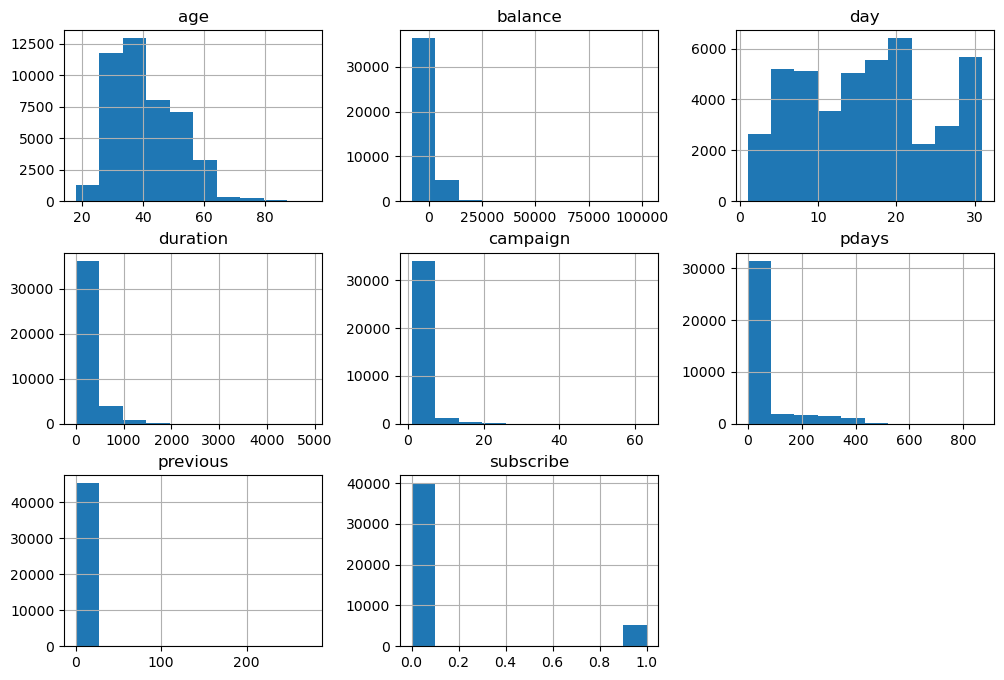

In [87]:
data.hist(figsize=(12,8))
plt.show()


Then, 
- age
- balance
- day
- duration
- campaign
- pdays
- previous
- subscribe

are numerical variables.

To see if they are continuous, discrete or binary, we can see the unique values for them:

In [91]:
numerical_variables = [
    column for column in data.columns if column not in categorical_variables
]
for col in numerical_variables:
    print(col, data[col].unique(), "\n")

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

balance [2.1430e+03 2.9000e+01 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04] 

day [ 5. nan  6.  7.  8.  9. 12. 13. 14. 15. 16. 19. 20. 21. 23. 26. 27. 28.
 29. 30.  2.  3.  4. 11. 17. 18. 24. 25.  1. 10. 22. 31.] 

duration [ 261.  151.   76. ... 1298. 1246. 1556.] 

campaign [ 1. nan  2.  3.  5.  4.  6.  8.  7.  9. 12. 10. 13. 11. 19. 14. 24. 16.
 18. 22. 32. 17. 25. 43. 51. 63. 41. 26. 15. 55. 50. 38. 23. 21. 28. 20.
 31. 37. 29. 30. 46. 58. 27. 33. 35. 34. 36. 39. 44.] 

pdays [ -1.  nan 151. 166.  91. 147. 176. 174. 170. 167. 195. 129. 188. 196.
 172. 118. 119. 117. 164. 132. 131. 123. 159. 186. 111. 115. 116. 173.
 178. 152.  96. 103. 150. 175. 110. 104. 181. 165. 185. 154. 145. 171.
 126. 193. 180. 109. 101. 158. 168.  97. 182. 127. 194. 

The **continuous** variables are:
- balance
- duration

The **discrete** variables are:
- age
- day
- campaign
- pdays
- previous

And, the **binary** variable is:
- subscribe

The official solution https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/exercises/03-variable-types/solution.ipynb considered only `day` as discrete one and the others as continuous. 

# Which other types of variables that we saw in the course, are not present in this dataset?

Datetime and mixed variables are not present in this dataset.